## Regularizzation 
#### It is a ml technique that helps in the genrlization(simplified)

1. it is used for to solve the overfiting problem
2. we try to solve the j(Q)=0 prblem with the help of panalty

## Types of reg..
#### 1- Lasso reg... (L1 reg)
1. it helps to featurs selection and the prevent overfitting
1. new cost= error(j(Q))+ lambda.panalty
2. where the lambds panalty is the extra add value to the J value, J(Q)=0+panalty
4. the panalty dpends on the features values
5. our model select the imp and unimp features,that helps to find the best J(Q) value
6. and last the model is more simplified according to norml ml 
#### 2-Ridge reg...  (L2 reg)
1. it prevant the overfitting
1. new cost = error+lambda(slope)^2
2. the J value is +ve
3. shift the line to x axees 
#### 3-Elastic reg... (combo of L1 and L2)


In [11]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


In [12]:
insurance=pd.read_csv("insurance.csv") 


In [13]:
# FEATURE ENGENEARING

X=insurance.drop(columns=["charges"])  
y=insurance["charges"] 

# ONe Hot Encoding
X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})  
# female=1, or male =0

X["smoker"]=X["smoker"].map({"yes":1,"no":0})

# INTERACTION FEATURES
X["age_smoker"]=X["age"]* X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [6]:
# # split into two parts

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)

# # train our model

# from sklearn.linear_model import LinearRegression

# model=LinearRegression()
# model.fit(X_train,y_train)

# y_pred=model.predict(X_test)

# # EVALUATE

# from sklearn.metrics import r2_score

# r2_test=r2_score(y_test,y_pred)
# print("r_squred :" ,r2_test)

# n=X_test.shape[0]
# p=X_test.shape[1]

# adjusted_r2=1-((1-r2_test)*(n-1)/(n-p-1))
# print("adjusted r^2 :",adjusted_r2)

r_squred : 0.8503582767615336
adjusted r^2 : 0.8468863110251423


In [7]:
# # underfit and overfit
# # r2 training is low and r2 testing is also low- underfit
# # r2 training   >>> r2 testing  overerfit

# y_train_pred=model.predict(X_train)
# r2_train= r2_score(y_train,y_train_pred)

# print("the training r2 value is :",r2_train)
# print("the testing r2 value is :",r2_test)



the training r2 value is : 0.8353480840643119
the testing r2 value is : 0.8503582767615336


In [24]:
mean=[]
a=[0.1,0.2,0.3,2,3,2,5,6,23,50]
for i in a:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mean.append(mse)
    print(f" MSE for alpha = {i}: " ,mse)

print(mean)    



 MSE for alpha = 0.1:  21928719.867663145
 MSE for alpha = 0.2:  21928250.63799819
 MSE for alpha = 0.3:  21927787.215702385
 MSE for alpha = 2:  21920790.582004003
 MSE for alpha = 3:  21917453.053572323
 MSE for alpha = 2:  21920790.582004003
 MSE for alpha = 5:  21912507.099162195
 MSE for alpha = 6:  21910898.65050036
 MSE for alpha = 23:  21971650.738882817
 MSE for alpha = 50:  22352434.2460402
[21928719.867663145, 21928250.63799819, 21927787.215702385, 21920790.582004003, 21917453.053572323, 21920790.582004003, 21912507.099162195, 21910898.65050036, 21971650.738882817, 22352434.2460402]


<Axes: >

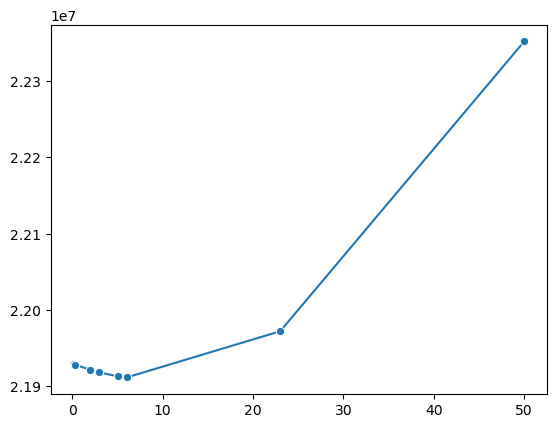

In [25]:
import seaborn as sns
sns.lineplot(x=a ,y=mean,marker="o")

In [30]:
from sklearn.linear_model import LassoCV
# we use the cross model with the help of lassoCV model to predict the alpha value automatickly

a=[0.1,0.2,0.3,2,3,2,5,6,23,50]

lasso_CV_model=LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)
# y_pred=lasso_model.predict(X_test)
# mse=mean_squared_error(y_test,y_pred)

lasso_CV_model.fit(X_train,y_train)
print("best alpha :" ,lasso_CV_model.alpha_)

y_pred=lasso_CV_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)

mse

best alpha : 0.1


21928719.867663145

In [31]:
from sklearn.linear_model import RidgeCV
# we use the cross model with the help of lassoCV model to predict the alpha value automatickly

a=[0.1,0.2,0.3,2,3,2,5,6,23,50]

RidgeCV_model=RidgeCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)
# y_pred=lasso_model.predict(X_test)
# mse=mean_squared_error(y_test,y_pred)

RidgeCV_model.fit(X_train,y_train)
print("best alpha :" ,RidgeCV_model.alpha_)

y_pred=RidgeCV_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)

mse

TypeError: _BaseRidgeCV.__init__() got an unexpected keyword argument 'max_iter'